In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [41]:
x = 2
y = 2
nx = 21
my = 21
nt = 80

dx = x/(nx-1)
dy = y/(my-1)

c = 1
nu = 0.3
sigma = 0.2
dt = sigma*dx**2/nu

xarr = np.linspace(0, x, nx)
yarr = np.linspace(0, y, my)

In [42]:
# Initializing variables
def initialize():

    u = np.ones((nx,my))
    v = np.ones((nx,my))
    
    u[int(.5/dy):int(1/dy + 1),int(.5/dx):int(1/dx + 1)] = 2
    v[int(.5/dy):int(1/dy + 1),int(.5/dx):int(1/dx + 1)] = 2
    
    return u, v

initialize()

(array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1.,


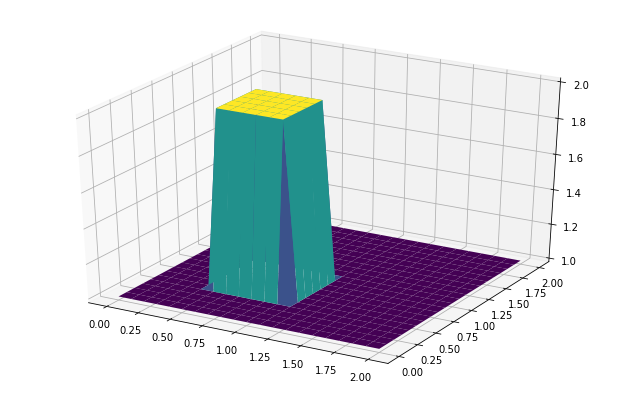

In [43]:
# Plotting figures
def plot():
    u, v = initialize()
    fig = plt.figure(figsize = (11,7))
    ax = fig.gca( projection = '3d')
    
    X, Y = np.meshgrid(xarr, yarr)
    surf1 = ax.plot_surface(X, Y, u, cmap = plt.cm.viridis)
    
plot()

In [44]:
# Computation using for-loop

def numerics():
    h, k = initialize()
    
    for it in range(nt):
        un = h.copy()
        vn = k.copy()
        
        h[1:, 1:] = un[1:, 1:] - (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[:-1, 1:])) - (vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[1:, :-1]))
        k[1:, 1:] = vn[1:, 1:] - (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[:-1, 1:])) - (vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[1:, :-1]))

        h[0, :] = 1
        h[-1, :] = 1
        h[:, 0] = 1
        h[:, -1] = 1

        k[0, :] = 1
        k[-1, :] = 1
        k[:, 0] = 1
        k[:, -1] = 1
    
    return h, k

comp_u, comp_v = numerics()
print(comp_u, comp_v)

[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1.         1.        ]
 [1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         1.
  1.         1. 

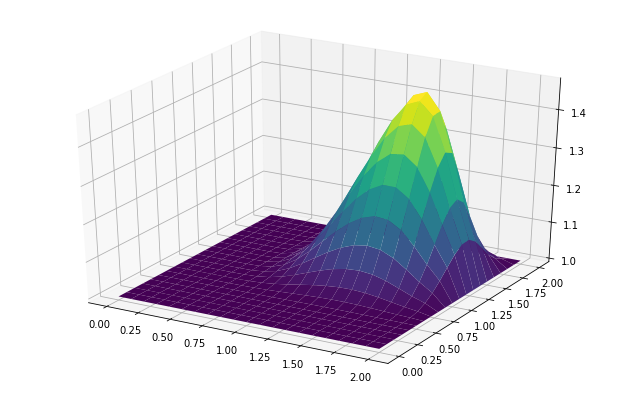

In [45]:
#Plotting comp_u
fig = plt.figure(figsize = (11,7))
ax = fig.gca( projection = '3d')

X, Y = np.meshgrid(xarr, yarr)
surf2 = ax.plot_surface(X, Y, comp_u, cmap = plt.cm.viridis)

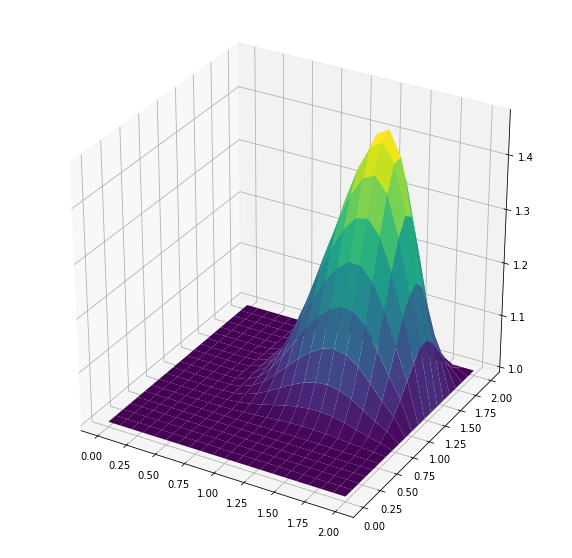

In [46]:
#Plotting comp_v
fig = plt.figure(figsize = (10,10))
ax = fig.gca( projection = '3d')
surf4 = ax.plot_surface(X, Y, comp_v, cmap = plt.cm.viridis)